In [1]:
# 设置异步显存分配
import os
# os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

import tensorflow as tf

# # 按需分配显存
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e:
#         print(e)

# 设置显存限制为6GB
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # 选择第一个GPU（如果有多个GPU，可以选择其它GPU）
        tf.config.set_visible_devices(gpus[0], 'GPU')
        
        # 设置显存限制（单位为MB）
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=6144)])  # 6GB显存限制
    except RuntimeError as e:
        print("设置GPU显存限制时出错:", e)

def get_specific_files_list(directory,ends='.png'):
    # Get all files within the training set
    all_files = os.listdir(directory)
 # Get the specific ending files's name
    png_files = [i for i in all_files if i.endswith(ends)]
    
    return sorted(png_files)

import cv2, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid", {'axes.grid' : False})
# enter your path here
dir_img = "C:/Users/Big_Father/SefiDrivingCars_OverseaResearch/task9_Cityscape/leftImg8bit_trainvaltest/leftImg8bit/train"
dir_seg = "C:/Users/Big_Father/SefiDrivingCars_OverseaResearch/task9_Cityscape/gtFine_trainvaltest/gtFine/train"

img_cities = sorted(os.listdir(dir_img))
seg_cities = sorted(os.listdir(dir_seg))
print(img_cities)

dir_img_show = dir_img + "/" + img_cities[0]
dir_seg_show = dir_seg + "/" + seg_cities[0]
print(dir_img_show)

# Helper function to get files with specific extension
def get_specific_files_list(directory, extension):
    return sorted([f for f in os.listdir(directory) if f.endswith(extension)])
     
# Get file lists
img_png_files_ls = get_specific_files_list(dir_img_show, '.png')
seg_label_files_ls = get_specific_files_list(dir_seg_show, 'labelIds.png')
seg_instance_files_ls = get_specific_files_list(dir_seg_show, 'instanceIds.png')   # Added instanceIds

# Pick the first image file in aachen
img_pic_name = img_png_files_ls[0]
seg_pic_name = seg_label_files_ls[0]
instance_pic_name = seg_instance_files_ls[0]   # Added instance pic

# Read in the original image and segmentation labels
dir_orig_img = dir_img_show + "/" + img_pic_name
dir_orig_seg = dir_seg_show + "/" + seg_pic_name
dir_orig_instance = dir_seg_show + "/" + instance_pic_name   # Added instance file

print(dir_orig_img)
print(dir_orig_seg)
print(dir_orig_instance)  


['aachen', 'bochum', 'bremen', 'cologne', 'darmstadt', 'dusseldorf', 'erfurt', 'hamburg', 'hanover', 'jena', 'krefeld', 'monchengladbach', 'strasbourg', 'stuttgart', 'tubingen', 'ulm', 'weimar', 'zurich']
C:/Users/Big_Father/SefiDrivingCars_OverseaResearch/task9_Cityscape/leftImg8bit_trainvaltest/leftImg8bit/train/aachen
C:/Users/Big_Father/SefiDrivingCars_OverseaResearch/task9_Cityscape/leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png
C:/Users/Big_Father/SefiDrivingCars_OverseaResearch/task9_Cityscape/gtFine_trainvaltest/gtFine/train/aachen/aachen_000000_000019_gtFine_labelIds.png
C:/Users/Big_Father/SefiDrivingCars_OverseaResearch/task9_Cityscape/gtFine_trainvaltest/gtFine/train/aachen/aachen_000000_000019_gtFine_instanceIds.png


seg.shape=(1024, 2048), img_is.shape=(1024, 2048, 3), instance_seg.shape=(1024, 2048)
minimum seg = 0, maximum seg = 33, Total number of segmentation classes = 34


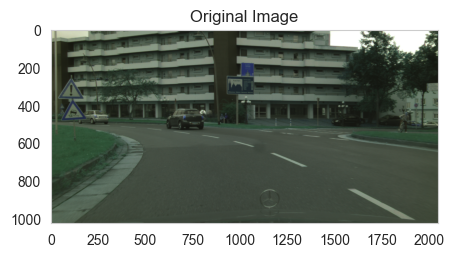

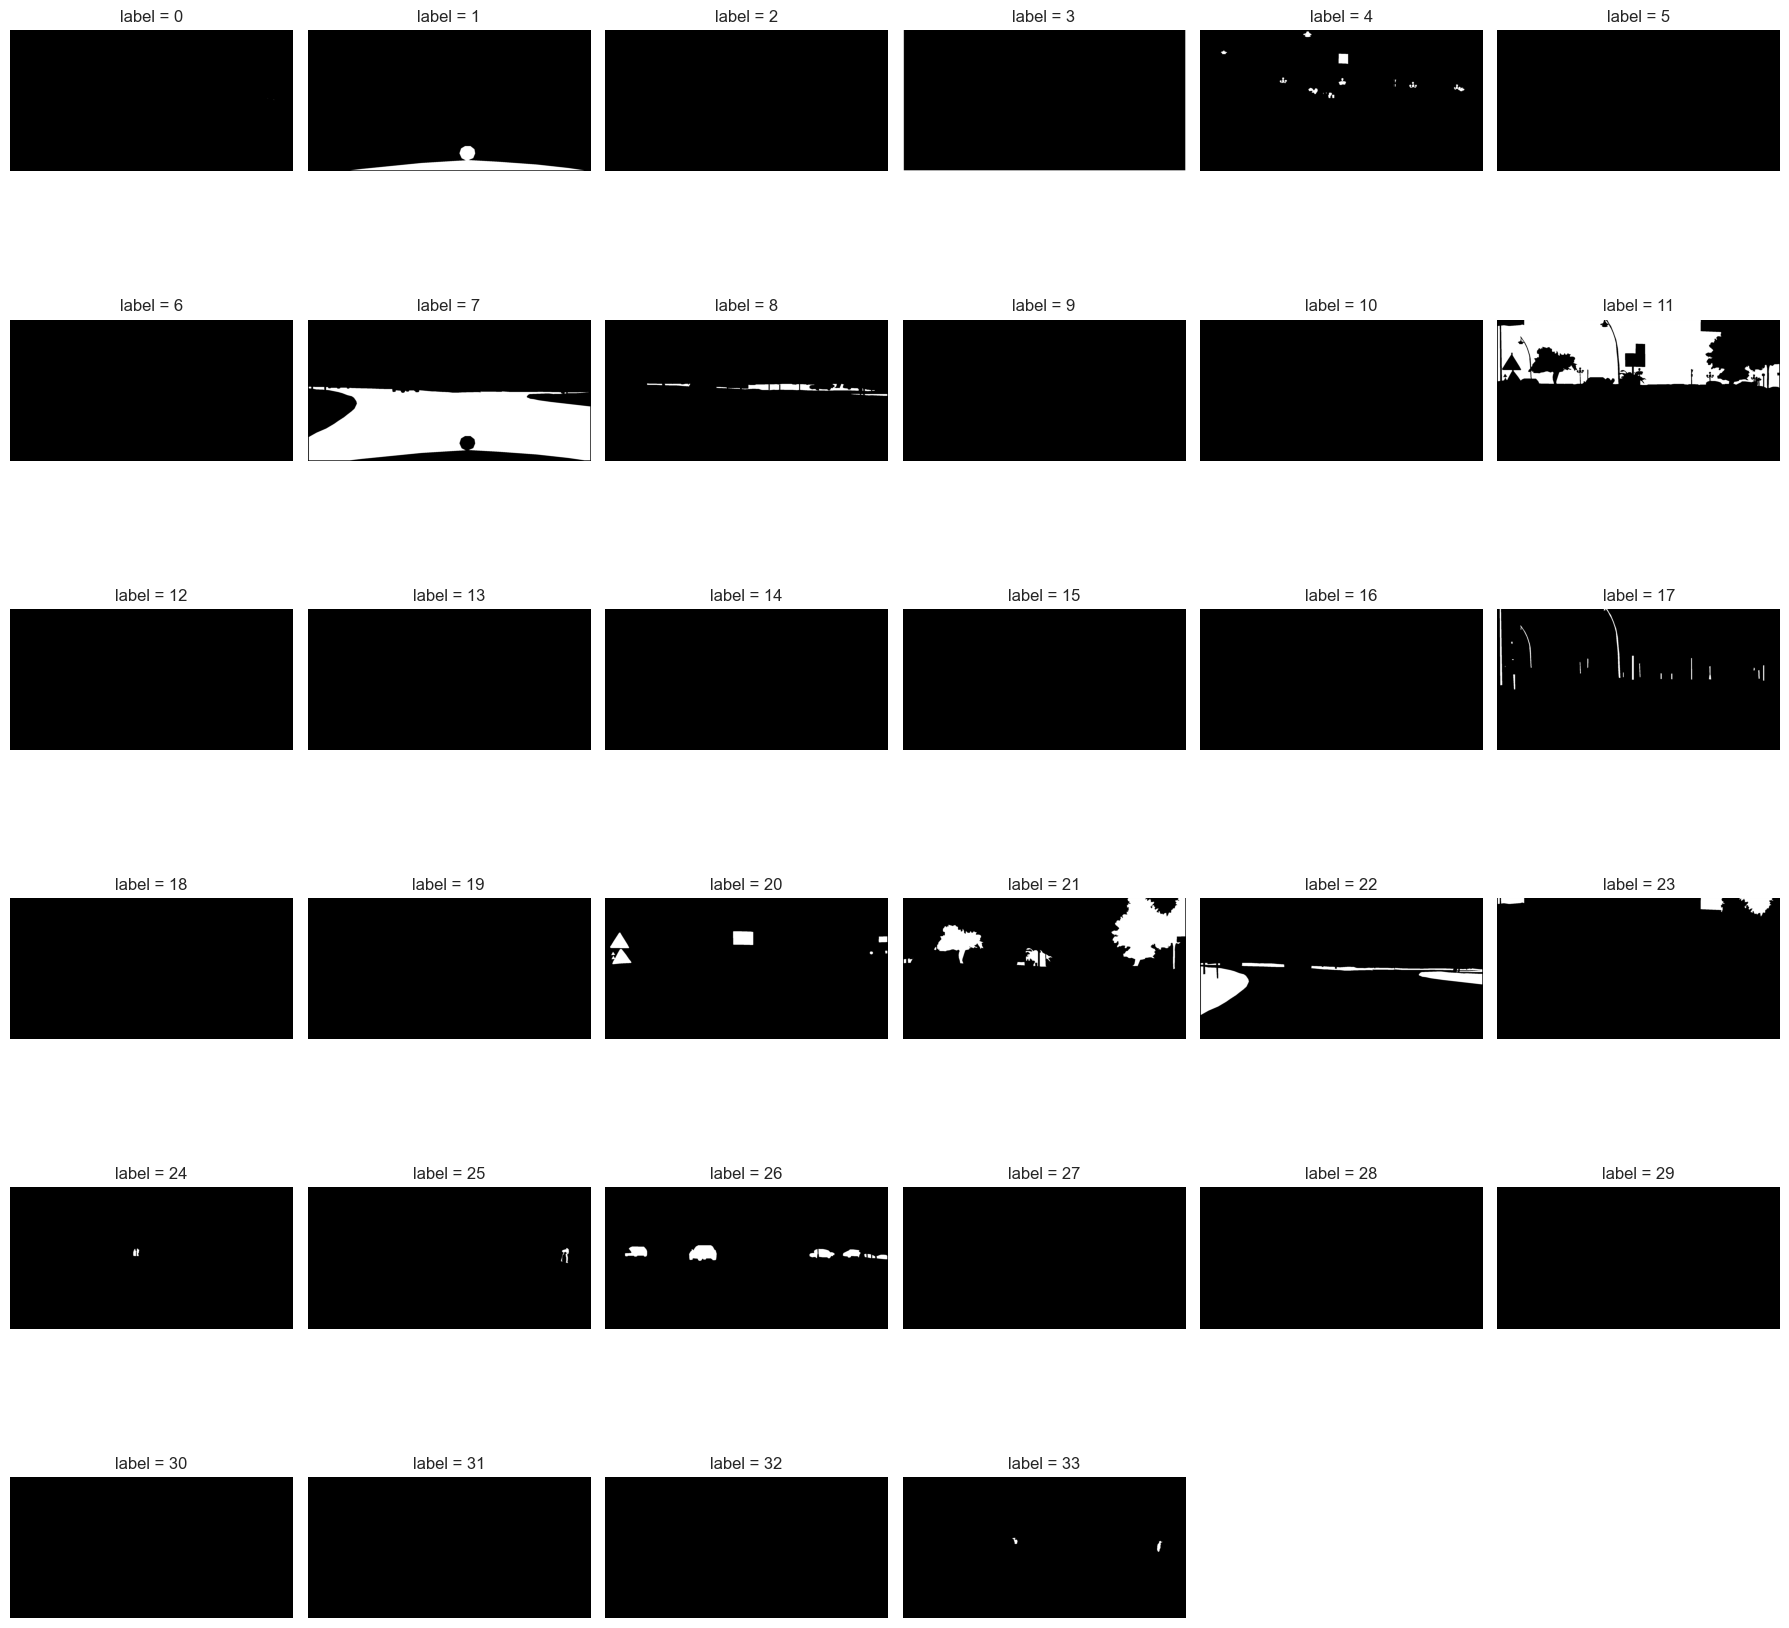

In [2]:
# Read images
seg = cv2.imread(dir_orig_seg, cv2.IMREAD_UNCHANGED)
img_is = cv2.imread(dir_orig_img)

print("seg.shape={}, img_is.shape={}, instance_seg.shape={}".format(seg.shape, img_is.shape, seg.shape))

# Check the number of labels
mi, ma = np.min(seg), np.max(seg)
n_classes = ma - mi + 1
print("minimum seg = {}, maximum seg = {}, Total number of segmentation classes = {}".format(mi, ma, n_classes))

# Plot original image
plt.figure(figsize=(5,5))
plt.title("Original Image")
plt.imshow(img_is)
plt.show()

# Plot all class
cols = 6
rows = int(np.ceil(n_classes / cols))
fig = plt.figure(figsize=(cols * 3, rows * 3))
for k in range(mi, ma + 1):
    ax = fig.add_subplot(rows, cols, k + 1)
    ax.imshow((seg == k) * 1.0, cmap='gray')
    ax.set_title(f"label = {k}")
    ax.axis('off')
    
plt.tight_layout()
plt.show()



instance_seg.shape=(1024, 2048)


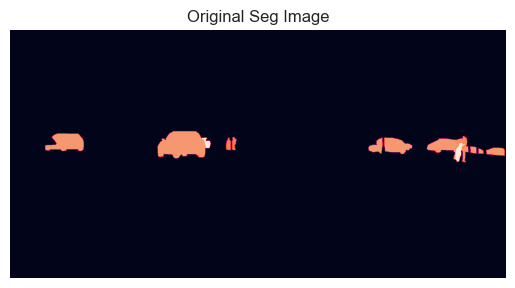

Total number of instances = 5


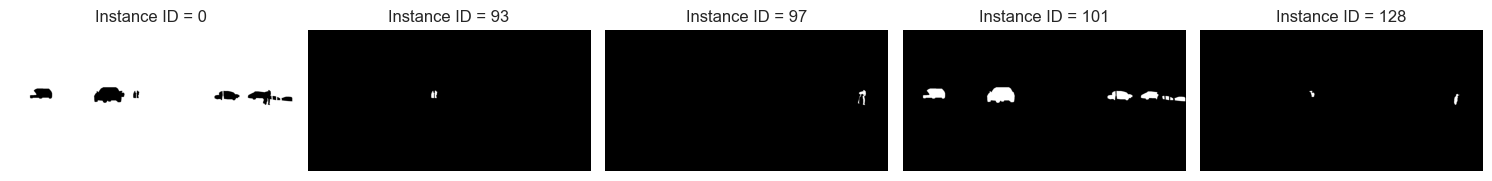

In [3]:
seg_instance_files_ls = get_specific_files_list(dir_seg_show, 'instanceIds.png')

instance_pic_name = seg_instance_files_ls[0]
dir_orig_instance = dir_seg_show + "/" + instance_pic_name

instance_seg = cv2.imread(dir_orig_instance, cv2.IMREAD_GRAYSCALE)
print("instance_seg.shape={}".format(instance_seg.shape))
plt.imshow(instance_seg)
plt.title('Original Seg Image')
plt.axis('off')
plt.show()

# Check unique instance IDs
mi_inst, ma_inst = np.min(instance_seg), np.max(instance_seg)
instance_ids = np.unique(instance_seg)
n_instances = len(instance_ids)
print(f"Total number of instances = {n_instances}")

# Dynamic grid layout
cols = 6
rows = int(np.ceil(n_instances / cols))

fig = plt.figure(figsize=(cols * 3, rows * 3))

for i, instance_id in enumerate(instance_ids):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.imshow((instance_seg == instance_id) * 1.0, cmap='gray')
    ax.set_title(f"Instance ID = {instance_id}")
    ax.axis('off')
    
plt.tight_layout()
plt.show()

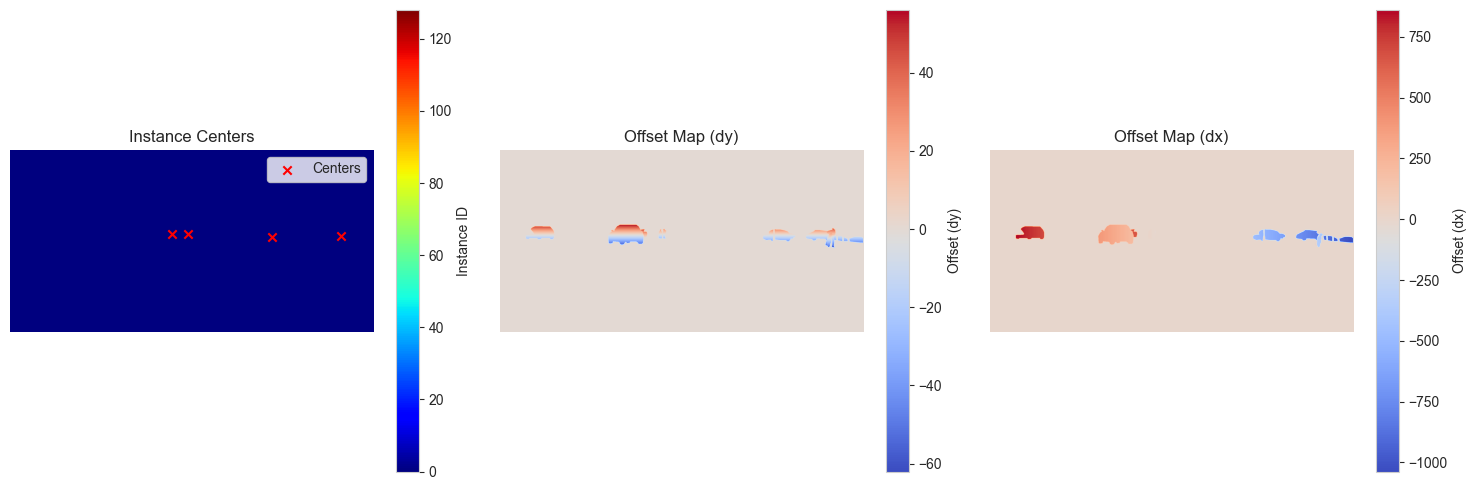

In [4]:
def compute_instance_centers(instance_seg):
    instance_centers = {}
    unique_ids = np.unique(instance_seg)
    
    for instance_id in unique_ids:
        if instance_id == 0:                   # 0 is background
            continue

        # Get the coordinates of pixels belonging to the current instance
        mask = (instance_seg == instance_id)
        coords = np.column_stack(np.where(mask))
        
        # Check if there are any coordinates before calculating the mean
        if coords.size > 0:
            center = np.mean(coords, axis=0).astype(np.int32)
            instance_centers[instance_id] = center
            
    return instance_centers
    
def compute_offset_map(instance_seg, instance_centers):
    height, width = instance_seg.shape
    offset_map = np.zeros((height, width, 2), dtype=np.float32)
    
    for instance_id, center in instance_centers.items():
        # Get the coordinates of pixels belonging to the current instance
            mask = (instance_seg == instance_id)
            coords = np.column_stack(np.where(mask))
        
            # Calculate the offset from each pixel to the center of its instance
            for coord in coords:
                offset = center - coord  # [dy, dx]
                offset_map[coord[0], coord[1], :] = offset
                
    return offset_map
    
# Compute the centers of each instance
instance_centers = compute_instance_centers(instance_seg)

# Compute the offset map based on the instance centers
offset_map = compute_offset_map(instance_seg, instance_centers)

# Prepare an empty image to visualize instance centers
instance_center_image = np.zeros(instance_seg.shape, dtype=np.float32)

# Mark the instance centers on the image for visualization
for instance_id, center in instance_centers.items():
    # Set a value in the instance_center_image to represent the center
    instance_center_image[center[0], center[1]] = instance_id          # Using instance_id for visibility
    
# Show the offset map (dy and dx channels separately)
plt.figure(figsize=(15, 5)) 

# Plot Instance Centers
plt.subplot(1, 3, 1)
plt.title("Instance Centers")
plt.imshow(instance_center_image, cmap='jet', interpolation='nearest')
plt.colorbar(label='Instance ID')
plt.scatter([c[1] for c in instance_centers.values()], [c[0] for c in instance_centers.values()],
        color='red', marker='x', label='Centers')
plt.legend()
plt.axis('off')  # Turn off axis

# Plot dy Offset Map
plt.subplot(1, 3, 2)
plt.title("Offset Map (dy)")
plt.imshow(offset_map[:, :, 0], cmap='coolwarm')
plt.colorbar(label='Offset (dy)')
plt.axis('off')  

# Plot dx Offset Map
plt.subplot(1, 3, 3)
plt.title("Offset Map (dx)")
plt.imshow(offset_map[:, :, 1], cmap='coolwarm')
plt.colorbar(label='Offset (dx)')
plt.axis('off')  

plt.tight_layout()
plt.show()


In [5]:
import random
colors = sns.color_palette("hls", n_classes)
print(colors)

[(0.86, 0.3712, 0.33999999999999997), (0.86, 0.46296470588235294, 0.33999999999999997), (0.86, 0.5547294117647059, 0.33999999999999997), (0.86, 0.6464941176470588, 0.33999999999999997), (0.86, 0.7382588235294117, 0.33999999999999997), (0.86, 0.8300235294117648, 0.33999999999999997), (0.7982117647058823, 0.86, 0.33999999999999997), (0.7064470588235293, 0.86, 0.33999999999999997), (0.6146823529411763, 0.86, 0.33999999999999997), (0.5229176470588235, 0.86, 0.33999999999999997), (0.4311529411764704, 0.86, 0.33999999999999997), (0.33999999999999997, 0.86, 0.34061176470588245), (0.33999999999999997, 0.86, 0.43237647058823525), (0.33999999999999997, 0.86, 0.5241411764705882), (0.33999999999999997, 0.86, 0.6159058823529412), (0.33999999999999997, 0.86, 0.7076705882352942), (0.33999999999999997, 0.86, 0.7994352941176471), (0.33999999999999997, 0.8287999999999999, 0.86), (0.33999999999999997, 0.7370352941176468, 0.86), (0.33999999999999997, 0.6452705882352939, 0.86), (0.33999999999999997, 0.5535

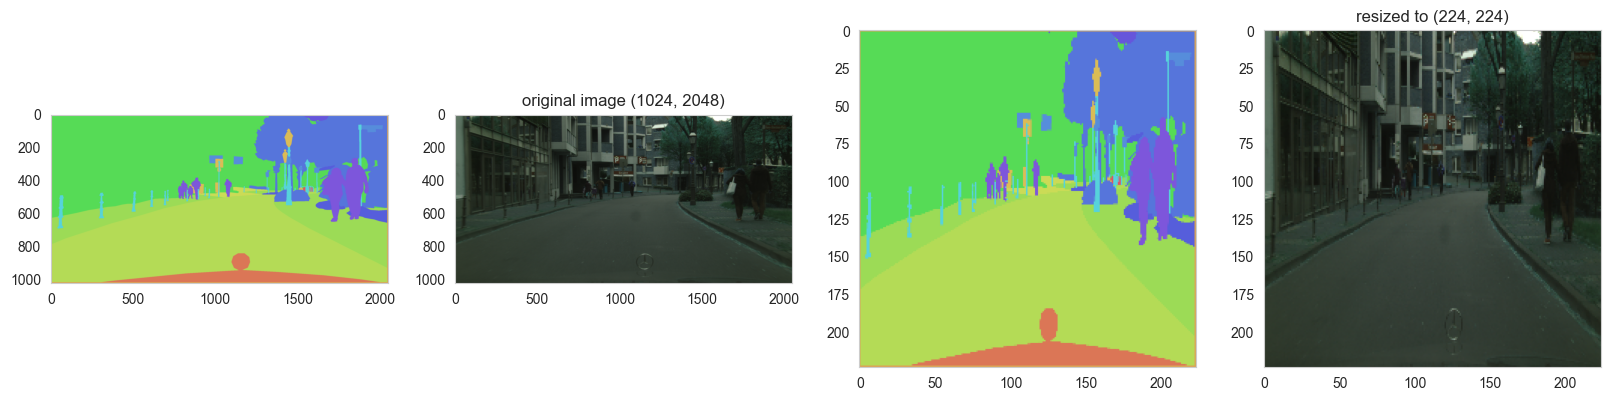

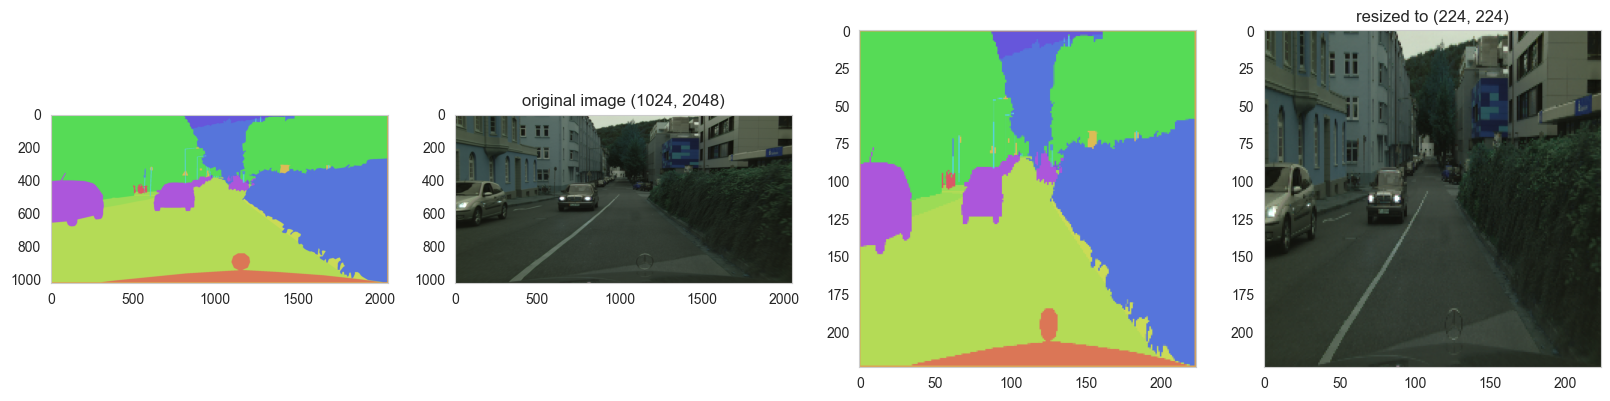

In [6]:
def give_color_to_seg_img(seg, n_classes):
    colors = sns.color_palette("hls", n_classes)
    seg_img = np.zeros((seg.shape[0], seg.shape[1], 3), dtype=np.uint8)
    for i in range(n_classes):
        seg_img[seg[:,:,0] == i] = np.array(colors[i])* 255
    return(seg_img)

input_height , input_width = 224 , 224
output_height , output_width = 224 , 224

for i in np.random.choice(len(img_png_files_ls),2,replace=False):
    # randomly select on the training image
    seg = cv2.imread(dir_seg_show + "/" + seg_label_files_ls[i])
    img_is = cv2.imread(dir_img_show + "/"+ img_png_files_ls[i])

    # assign color to its annotations_prepped_train image
    seg_img = give_color_to_seg_img(seg,n_classes)

    fig = plt.figure(figsize=(20,40))
    ax = fig.add_subplot(1,4,1)
    ax.imshow(seg_img)

    ax = fig.add_subplot(1,4,2)
    ax.imshow(img_is/255.0)
    ax.set_title("original image {}".format(img_is.shape[:2]))

    ax = fig.add_subplot(1,4,3)
    ax.imshow(cv2.resize(seg_img,(output_height , output_width)))

    ax = fig.add_subplot(1,4,4)
    ax.imshow(cv2.resize(img_is,(output_height , output_width))/255.0)
    ax.set_title("resized to {}".format((output_height , output_width)))
    plt.show()


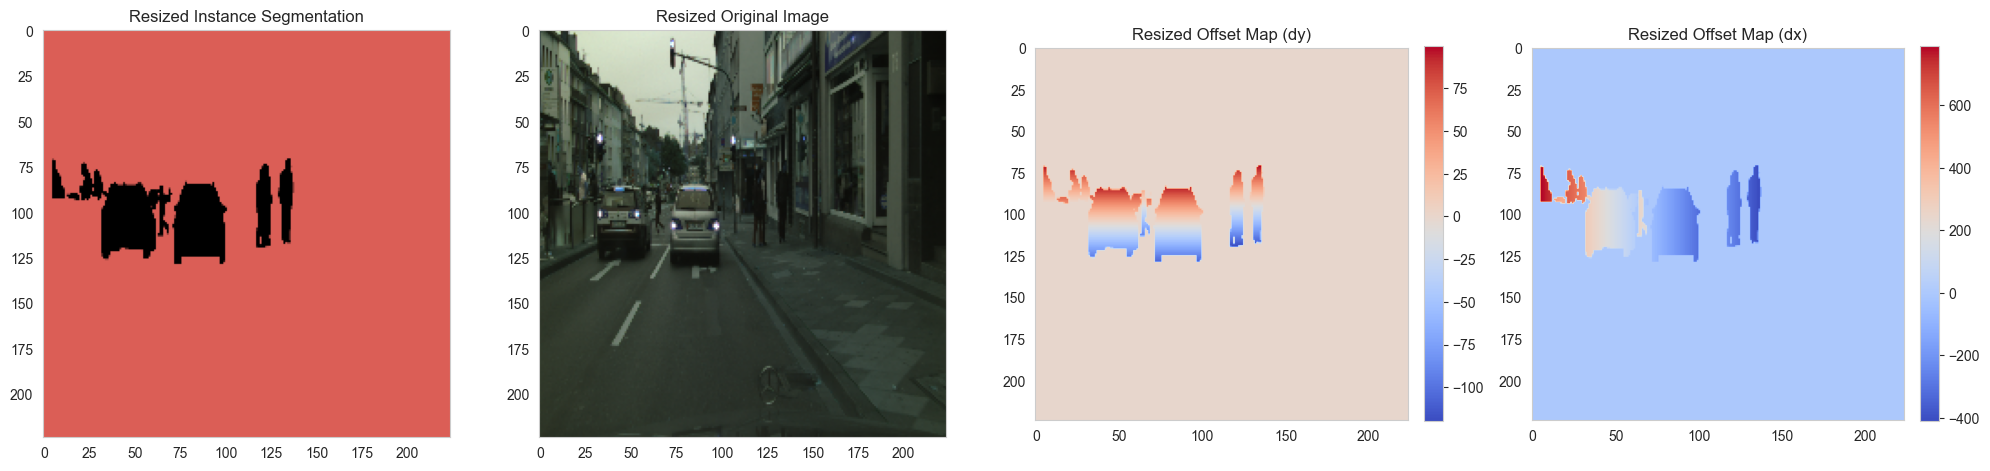

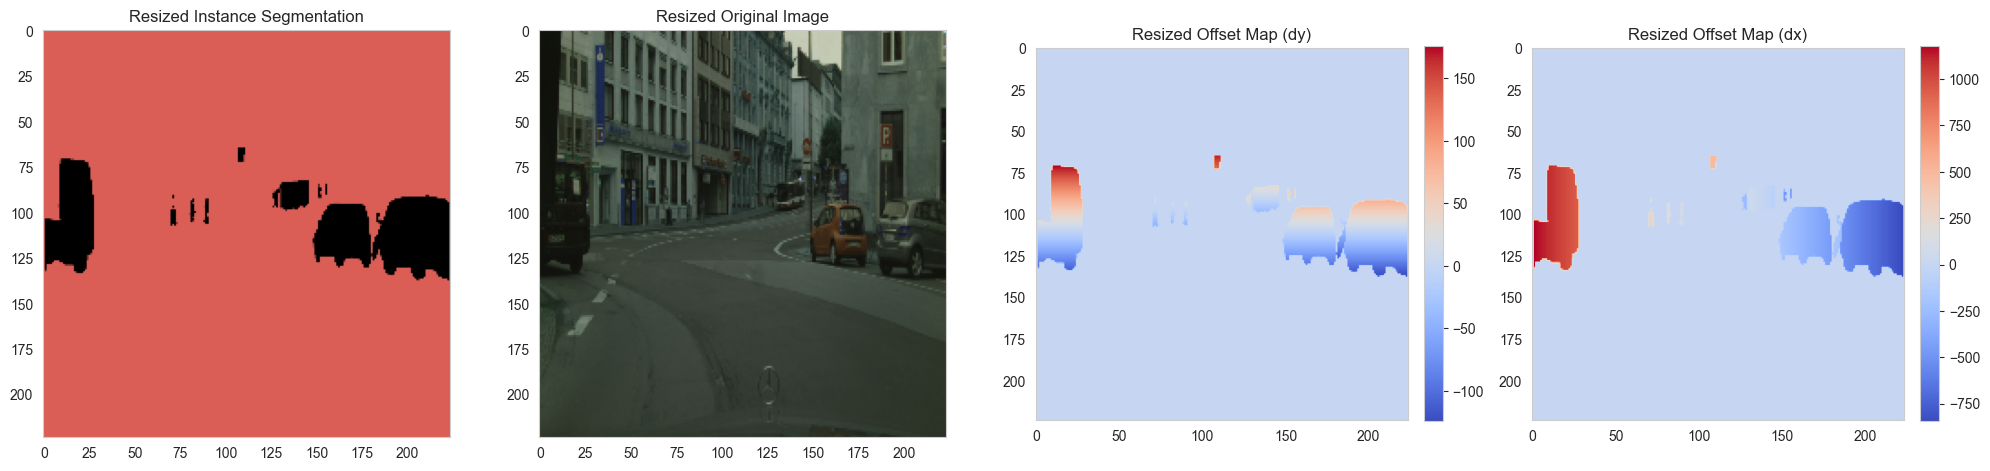

In [7]:
def give_color_to_instance_img(instance_seg, n_instances):
    '''
    instance_seg : size is (input_width, input_height)
    Assign color to each instance.
    Use sns color palette to assign color pattern.
    '''
    # Generate a color palette with 'n_instances' distinct colors
    colors = sns.color_palette("hls", n_instances)
    
    # Initialize an empty image for the colored output
    inst_img = np.zeros((instance_seg.shape[0], instance_seg.shape[1], 3), dtype=np.uint8)
    
    # Color each instance according to its label
    for i in range(n_instances):
        inst_img[instance_seg == i] = (np.array(colors[i]) * 255).astype(np.uint8)
        
    return inst_img


# Randomly select two images for visualization
for i in np.random.choice(len(img_png_files_ls), 2, replace=False):
    # Read the instance segmentation and original image
    instance_seg = cv2.imread(dir_seg_show + "/" + seg_instance_files_ls[i], cv2.IMREAD_GRAYSCALE)  # Original instance segmentation
    img_is = cv2.imread(dir_img_show + "/" + img_png_files_ls[i])      # Original image
    
    # Assign color to the instance segmentation image
    inst_img = give_color_to_instance_img(instance_seg, n_instances)
    
    # Resize the instance segmentation and original image
    resized_inst_img = cv2.resize(inst_img, (output_width, output_height))
    resized_img_is = cv2.resize(img_is, (output_width, output_height)) / 255.0
    
    # Compute the offset map (this assumes compute_instance_centers and compute_offset_map are defined)
    instance_centers = compute_instance_centers(instance_seg)
    offset_map = compute_offset_map(instance_seg, instance_centers)
    
    # Resize the offset map to the desired dimensions
    resized_offset_map = cv2.resize(offset_map, (output_width, output_height))
    
    # Create a figure for displaying the images
    fig = plt.figure(figsize=(20, 40))
    
    # Show resized instance segmentation
    ax1 = fig.add_subplot(1, 4, 1)
    ax1.imshow(resized_inst_img)
    ax1.set_title("Resized Instance Segmentation")
    
    # Show resized original image
    ax2 = fig.add_subplot(1, 4, 2)
    ax2.imshow(resized_img_is)
    ax2.set_title("Resized Original Image")
    
    # Show resized offset map (dy)
    ax3 = fig.add_subplot(1, 4, 3)
    im_dy = ax3.imshow(resized_offset_map[:, :, 0], cmap='coolwarm')
    ax3.set_title("Resized Offset Map (dy)")
    plt.colorbar(im_dy, ax=ax3, fraction=0.046, pad=0.04)  # Adjust colorbar size
    
    # Show resized offset map (dx)
    ax4 = fig.add_subplot(1, 4, 4)
    im_dx = ax4.imshow(resized_offset_map[:, :, 1], cmap='coolwarm')
    ax4.set_title("Resized Offset Map (dx)")
    plt.colorbar(im_dx, ax=ax4, fraction=0.046, pad=0.04)  # Adjust colorbar size
    
    plt.tight_layout()
    plt.show()

In [8]:
## Import usual libraries
import sys
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Reshape, Conv2DTranspose, UpSampling2D, Concatenate, BatchNormalization, ReLU, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.applications import ResNet101
import pandas as pd
from tensorflow.keras.utils import Sequence
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tfkan import layers
from tfkan.layers import DenseKAN, Conv2DKAN
import warnings
warnings.filterwarnings("ignore")

# check python, keras, and tensorflow version
print("python {}".format(sys.version))
print("tensorflow version {}".format(tf.__version__))


python 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
tensorflow version 2.10.0


In [16]:
from tensorflow.keras.layers import Activation

def ASPP(input_map): # we use ouput stride = 16
    atrous_rates = [6, 12, 18]
    # 1x1 Convolution
    branch0 = Conv2D(256, (1,1), padding='same', use_bias=False)(input_map)
    # branch0 = Conv2DKAN(256, (1,1), padding='same', use_bias=False)(input_map)
    branch0 = BatchNormalization()(branch0)
    branch0 = ReLU()(branch0)

    # Atrous convolutions
    # branch1 = Conv2D(256, (3,3), padding='same', dilation_rate=atrous_rates[0], use_bias=False)(input_map)
    branch1 = Conv2DKAN(256, (3,3), padding='same', use_bias=False)(input_map)
    branch1 = BatchNormalization()(branch1)
    branch1 = ReLU()(branch1)
    
    # branch2 = Conv2D(256, (3,3), padding='same', dilation_rate=atrous_rates[1], use_bias=False)(input_map)
    branch2 = Conv2DKAN(256, (3,3), padding='same', use_bias=False)(input_map)
    branch2 = BatchNormalization()(branch2)
    branch2 = ReLU()(branch2)
    
    # branch3 = Conv2D(256, (3,3), padding='same', dilation_rate=atrous_rates[2], use_bias=False)(input_map)
    branch3 = Conv2DKAN(256, (3,3), padding='same', use_bias=False)(input_map)
    branch3 = BatchNormalization()(branch3)
    branch3 = ReLU()(branch3)
    
    # Image pooling
    branch4 = GlobalAveragePooling2D()(input_map)
    branch4 = Reshape((1, 1, branch4.shape[-1]))(branch4)
    # branch4 = Conv2DKAN(256, (1,1), padding='same', use_bias=False)(branch4)
    branch4 = Conv2D(256, (1,1), padding='same', use_bias=False)(branch4)
    branch4 = BatchNormalization()(branch4)
    branch4 = ReLU()(branch4)
    branch4 = UpSampling2D(size=(input_map.shape[1], input_map.shape[2]), interpolation='bilinear')(branch4)
    
    # Concatenate and output
    output = Concatenate()([branch0, branch1, branch2, branch3, branch4])
    
    print(f"ASPP output shape:{output.shape}")     # The following part in deeplabv3+ is merged into the two branches of decoder.     # output = Conv2D(256, (1,1), padding='same', use_bias=False)(output)     # output = BatchNormalization()(output)     # output = ReLU()(output)     
    return output


#Build up the decoders and predictions modules

def semantic_decoder(ASPP_map, low_level_map, middle_level_map, nClasses):
    low_level_map = Conv2D(64, (1, 1), padding='same', use_bias=False)(low_level_map)
    low_level_map = BatchNormalization()(low_level_map)
    low_level_map = ReLU()(low_level_map)
    
    middle_level_map = Conv2D(32, (1, 1), padding='same', use_bias=False)(middle_level_map)
    middle_level_map = BatchNormalization()(middle_level_map)
    middle_level_map = ReLU()(middle_level_map)
    
    #1x1 conv after the ASPP
    output = Conv2D(256, (1, 1), padding='same', use_bias=False)(ASPP_map)
    output = BatchNormalization()(output)
    output = ReLU()(output)
    
    #Upsample and concatenate
    output = UpSampling2D(size=(2, 2), interpolation='bilinear')(output)
    output = Concatenate()([output, middle_level_map])
    
    #5x5 conv and upsample
    output = Conv2D(256, (5,5), padding='same', use_bias=False)(output)
    output = BatchNormalization()(output)
    output = ReLU()(output)
    
    output = UpSampling2D(size=(2, 2), interpolation='bilinear')(output)
    output = Concatenate()([output, low_level_map])
    
    #5x5 conv
    output = Conv2D(256, (5, 5), padding='same', use_bias=False)(output)
    output = BatchNormalization()(output)
    output = ReLU()(output)
    
    output = UpSampling2D(size=(4, 4), interpolation='bilinear')(output)    
    print(f"Semantic decoder output shape:{output.shape}")
    
    return output

def instance_decoder(ASPP_map, low_level_map, middle_level_map, nClasses):
    low_level_map = Conv2D(32, (1,1), padding='same', use_bias=False)(low_level_map)
    low_level_map = BatchNormalization()(low_level_map)
    low_level_map = ReLU()(low_level_map)
    
    middle_level_map = Conv2D(16, (1,1), padding='same', use_bias=False)(middle_level_map)
    middle_level_map = BatchNormalization()(middle_level_map)
    middle_level_map = ReLU()(middle_level_map)
    
    #1x1 conv after the ASPP
    output = Conv2D(256, (1,1), padding='same', use_bias=False)(ASPP_map)
    output = BatchNormalization()(output)
    output = ReLU()(output)
    
    #Upsample and concatenate
    output = UpSampling2D(size=(2, 2), interpolation='bilinear')(output)
    output = Concatenate()([output, middle_level_map])
    
    #5x5 conv and upsample
    output = Conv2D(128, (5,5), padding='same', use_bias=False)(output)
    output = BatchNormalization()(output)
    output = ReLU()(output)
    
    output = UpSampling2D(size=(2, 2), interpolation='bilinear')(output)
    output = Concatenate()([output, low_level_map])
    
    #5x5 conv
    output = Conv2D(128, (5,5), padding='same', use_bias=False)(output)
    output = BatchNormalization()(output)
    output = ReLU()(output)
    
    output = UpSampling2D(size=(4, 4), interpolation='bilinear')(output)     
    print(f"Instance decoder output shape:{output.shape}")    
    return output

def semantic_prediction(semantic_map, nClasses):     
    # 5x5 conv
    output = Conv2D(256, (5, 5), padding='same', use_bias=False)(semantic_map)
    output = BatchNormalization()(output)
    output = ReLU()(output)
    
    # 1x1 conv
    output = Conv2D(nClasses, (1, 1), padding='same', use_bias=False)(output)
    output = BatchNormalization()(output)
    
    # Use softmax to predict class probabilities for each pixel
    output = Activation('softmax', name='semantic_pred')(output)  # Name added here
    
    print(f"semantic_prediction output shape: {output.shape}")     
    return output

def instance_center_prediction(instance_map):    
    #5x5 conv
    output = Conv2D(32, (5, 5), padding='same', use_bias=False)(instance_map)
    output = BatchNormalization()(output)
    output = ReLU()(output)
    
    #1x1 conv: center heatmap
    output = Conv2D(1, (1, 1), padding='same', use_bias=False)(output)
    output = BatchNormalization()(output)
    
    # Sigmoid activation to get center probabilities
    output = Activation('sigmoid', name='instance_center_pred')(output)
    
    print(f"instance_center_prediction output shape: {output.shape}")     
    return output

def instance_center_regression(instance_map):     
    # 5x5 conv
    output = Conv2D(32, (5, 5), padding='same', use_bias=False)(instance_map)
    output = BatchNormalization()(output)
    output = ReLU()(output)
    
    # 1x1 conv: (dx, dy) offsets to the instance center     
    output = Conv2D(2, (1, 1), padding='same', use_bias=False)(output)
    output = BatchNormalization(name='instance_center_reg')(output)  # Name added here
    
    print(f"instance_center_regression output shape: {output.shape}")
    return output

#Using Resnet101 as backbone and implement the Panoptic Deeplab

def Panoptic_Deeplab(nClasses, input_height=224, input_width=224):     
    # Ensure input_height and width are divisible by 32     
    assert input_height % 32 == 0     
    assert input_width % 32 == 0
    
    img_input = Input(shape=(input_height, input_width, 3))  # Assuming 224, 224, 3
    
    # Load ResNet101 backbone
    resnet101 = ResNet101(weights='imagenet', include_top=False, input_tensor=img_input)
    
    # Get the features from different layers
    low_level_features = resnet101.get_layer("conv2_block3_out").output  # Low-level features 1/4 56x56x256
    middle_level_features = resnet101.get_layer("conv3_block4_out").output  # Middle-level features 1/8 28x28x512
    high_level_features = resnet101.get_layer("conv4_block23_out").output  # High-level features
    
    # Atrous Spatial Pyramid Pooling (ASPP) module / Encoder
    semantic_aspp = ASPP(high_level_features)
    instance_aspp = ASPP(high_level_features)
    
    # Decoder
    semantic_decoder_output = semantic_decoder(semantic_aspp, low_level_features, middle_level_features, nClasses)
    instance_decoder_output = instance_decoder(instance_aspp, low_level_features, middle_level_features, nClasses)
    
    # Prediction     
    # Assign proper names to the output tensors
    semantic_pred = semantic_prediction(semantic_decoder_output, nClasses)
    instance_center_pred = instance_center_prediction(instance_decoder_output)
    instance_center_reg = instance_center_regression(instance_decoder_output)
    
    # Create model
    model = Model(inputs=img_input,
        outputs=[semantic_pred, instance_center_pred, instance_center_reg])
    
    return model

# Get output layer names of the loaded model
model = Panoptic_Deeplab(nClasses=n_classes, input_height=224, input_width=224)
model.summary()


ASPP output shape:(None, 14, 14, 1280)
ASPP output shape:(None, 14, 14, 1280)
Semantic decoder output shape:(None, 224, 224, 256)
Instance decoder output shape:(None, 224, 224, 128)
semantic_prediction output shape: (None, 224, 224, 34)
instance_center_prediction output shape: (None, 224, 224, 1)
instance_center_regression output shape: (None, 224, 224, 2)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                              

 conv4_block4_out (Activation)  (None, 14, 14, 1024  0           ['conv4_block4_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv4_block7_out (Activation)  (None, 14, 14, 1024  0           ['conv4_block7_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block8_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block7_out[0][0]']       
                                                                                                  
 conv4_block8_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block8_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block8_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block8_1_bn[0][0]']      
 n)       

                                )                                 'conv4_block10_3_bn[0][0]']     
                                                                                                  
 conv4_block10_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block10_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block11_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block10_out[0][0]']      
                                                                                                  
 conv4_block11_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block13_add (Add)        (None, 14, 14, 1024  0           ['conv4_block12_out[0][0]',      
                                )                                 'conv4_block13_3_bn[0][0]']     
                                                                                                  
 conv4_block13_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block13_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block14_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block13_out[0][0]']      
                                                                                                  
 conv4_block14_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block14_1_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block16_add (Add)        (None, 14, 14, 1024  0           ['conv4_block15_out[0][0]',      
                                )                                 'conv4_block16_3_bn[0][0]']     
                                                                                                  
 conv4_block16_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block16_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block17_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block16_out[0][0]']      
                                                                                                  
 conv4_block17_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block17_1_conv[0][0]']   
 lization)

 lization)                      )                                                                 
                                                                                                  
 conv4_block19_add (Add)        (None, 14, 14, 1024  0           ['conv4_block18_out[0][0]',      
                                )                                 'conv4_block19_3_bn[0][0]']     
                                                                                                  
 conv4_block19_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block19_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block19_out[0][0]']      
                                                                                                  
 conv4_blo

 conv4_block22_3_bn (BatchNorma  (None, 14, 14, 1024  4096       ['conv4_block22_3_conv[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block22_add (Add)        (None, 14, 14, 1024  0           ['conv4_block21_out[0][0]',      
                                )                                 'conv4_block22_3_bn[0][0]']     
                                                                                                  
 conv4_block22_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block22_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block23_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block22_out[0][0]']      
          

                                                                                                  
 batch_normalization_3 (BatchNo  (None, 14, 14, 256)  1024       ['conv2d_3[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 re_lu_4 (ReLU)                 (None, 1, 1, 256)    0           ['batch_normalization_4[0][0]']  
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 14, 14, 256)  1024       ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 14, 14, 256)  1024       ['conv2d_6[0][0]']               
 rmalizati

                                                                                                  
 concatenate_2 (Concatenate)    (None, 28, 28, 288)  0           ['up_sampling2d_2[0][0]',        
                                                                  're_lu_11[0][0]']               
                                                                                                  
 concatenate_4 (Concatenate)    (None, 28, 28, 272)  0           ['up_sampling2d_5[0][0]',        
                                                                  're_lu_16[0][0]']               
                                                                                                  
 conv2d_13 (Conv2D)             (None, 28, 28, 256)  1843200     ['concatenate_2[0][0]']          
                                                                                                  
 conv2d_18 (Conv2D)             (None, 28, 28, 128)  870400      ['concatenate_4[0][0]']          
          

 re_lu_21 (ReLU)                (None, 224, 224, 32  0           ['batch_normalization_22[0][0]'] 
                                )                                                                 
                                                                                                  
 batch_normalization_24 (BatchN  (None, 224, 224, 32  128        ['conv2d_24[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 conv2d_21 (Conv2D)             (None, 224, 224, 34  8704        ['re_lu_20[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 224, 224, 1)  32          ['re_lu_21[0][0]']               
          

In [17]:
#Prepare dataloader for the models
def getImageArr(path, width, height):
    img = cv2.imread(path, 1)
    img = np.float32(cv2.resize(img, (width, height))) / 127.5 - 1    
    return img
    
def getSegmentationArr(path, nClasses, width, height):
    seg_labels = np.zeros((height, width, nClasses))
    img = cv2.imread(path, 1)
    img = cv2.resize(img, (width, height))
    img = img[:, :, 0]  # Assuming the label map is stored in one channel (grayscale)
    
    for c in range(nClasses):
        seg_labels[:, :, c] = (img == c).astype(int)
        
    return seg_labels
    
def get_specific_files_list(directory, extension):     
    return [f for f in os.listdir(directory) if f.endswith(extension)]
    
def generate_instance_center_ground_truth(instance_seg, instance_centers, height, width):     
    # Create a ground truth map for instance centers
    ground_truth = np.zeros((height, width), dtype=np.float32)
    
    for instance_id, center in instance_centers.items():         
        # Mark the center position in the ground truth with the instance ID
        ground_truth[center[0], center[1]] = instance_id
        
    return ground_truth
    
def load_and_preprocess_image(img_path, input_size):     
    # Load the image
    img = cv2.imread(img_path)    
    
    # Resize the image
    img = cv2.resize(img, (input_size[1], input_size[0]))  # OpenCV uses (width, height)     
    # Normalize pixel values to [0, 1]
    img = img.astype(np.float32) / 255.0     
    return img
    
def load_and_preprocess_segmentation(seg_path, output_size, n_classes):    
    # Load the segmentation map
    seg = cv2.imread(seg_path, cv2.IMREAD_UNCHANGED)  # Read the segmentation map   

    # Resize the segmentation map
    seg = cv2.resize(seg, (output_size[1], output_size[0]))  # OpenCV uses (width, height)
    
    # Convert to one-hot encoding
    seg_one_hot = np.zeros((output_size[0], output_size[1], n_classes), dtype=np.float32)     
    for c in range(n_classes):
        seg_one_hot[:, :, c] = (seg == c).astype(float)  # Set the channel to 1 where class matches
        
    return seg_one_hot
    
def load_and_preprocess_instance_map(inst_path, output_size):     
    # Load the instance map
    instance_map = cv2.imread(inst_path, cv2.IMREAD_UNCHANGED)  # Read the instance map    

    if instance_map is None:  # 检查文件是否成功读取
        raise ValueError(f"Failed to load instance map: {inst_path}")
    
    # Resize the instance map
    instance_map = cv2.resize(instance_map, (output_size[1], output_size[0]))  # OpenCV uses (width, height)     
    return instance_map

class CityscapeDataGenerator(Sequence):     
    def __init__(self, img_cities, dir_img, dir_seg, batch_size, input_size, output_size, n_classes, shuffle=True):         
        self.img_cities = img_cities         
        self.dir_img = dir_img         
        self.dir_seg = dir_seg         
        self.batch_size = batch_size         
        self.input_size = input_size         
        self.output_size = output_size         
        self.n_classes = n_classes       
        self.shuffle = shuffle       
        self.file_pairs = self._get_file_pairs() 
        self.on_epoch_end()
        
    def _get_file_pairs(self):         
        """Collect all the image and segmentation file paths."""
        file_pairs = []         
        for city in self.img_cities:
            dir_img_city = os.path.join(self.dir_img, city)
            dir_seg_city = os.path.join(self.dir_seg, city)
            
            img_files = get_specific_files_list(dir_img_city, '.png')
            seg_files = get_specific_files_list(dir_seg_city, 'labelIds.png')
            instance_files = get_specific_files_list(dir_seg_city, 'instanceIds.png')
            
            # Sort all lists to ensure matching of images and labels
            img_files.sort()
            seg_files.sort()
            instance_files.sort()
            
            # Store full paths for each image and its corresponding segmentation and instance files
            for img, seg, inst in zip(img_files, seg_files, instance_files):
                file_pairs.append((
                    os.path.join(dir_img_city, img), 
                    os.path.join(dir_seg_city, seg), 
                    os.path.join(dir_seg_city, inst)
                )) 

        return file_pairs
                                                                                                                  
    def __len__(self):         
        return len(self.file_pairs) // self.batch_size
                                   
    def on_epoch_end(self):         
        if self.shuffle:
            np.random.shuffle(self.file_pairs)

    def __getitem__(self, index):
        batch_file_pairs = self.file_pairs[index * self.batch_size:(index + 1) * self.batch_size]
        X, Y_semantic, Y_instance, Y_offset = self.__data_generation(batch_file_pairs)         
        return X, {'semantic_pred': Y_semantic, 'instance_center_pred': Y_instance, 'instance_center_reg': Y_offset}
        
    def __data_generation(self, batch_file_pairs):
        X = np.zeros((self.batch_size, *self.input_size, 3), dtype=np.float32)
        Y_semantic = np.zeros((self.batch_size, *self.output_size, self.n_classes), dtype=np.float32)
        Y_instance = np.zeros((self.batch_size, *self.output_size, 1), dtype=np.float32)  # Shape (224, 224, 1)
        Y_offset = np.zeros((self.batch_size, *self.output_size, 2), dtype=np.float32)
        
        for i, (img_path, seg_path, inst_path) in enumerate(batch_file_pairs):             
            # Load the image
            img = load_and_preprocess_image(img_path, self.input_size)  # Make sure to define this function
            seg = load_and_preprocess_segmentation(seg_path, self.output_size, self.n_classes)  # Define this function too
            instance_map = load_and_preprocess_instance_map(inst_path, self.output_size)  # Define this function
            
            # Compute instance centers using instance_map
            instance_centers = compute_instance_centers(instance_map)
            offset_map = compute_offset_map(instance_map, instance_centers)
            
            # Generate ground truth for instance centers
            instance_center_gt = generate_instance_center_ground_truth(instance_map, instance_centers, self.output_size[0], self.output_size[1])
                                                                       
            # Update Y_instance: mark instance centers with 1 and others with 0
            Y_instance[i, :, :, 0] = (instance_center_gt > 0).astype(float)  # Assuming > 0 indicates a center
            
            X[i] = img
            Y_semantic[i] = seg
            Y_offset[i] = offset_map
            
        return X, Y_semantic, Y_instance, Y_offset

# Training Process
# Define IoU metric function

from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# Register each class IoU function with a unique name
get_custom_objects().clear()
@tf.keras.utils.register_keras_serializable()

def class_iou(class_index):     
    def iou(y_true, y_pred):         
        y_true_class = K.cast(K.equal(K.argmax(y_true, axis=-1), class_index), 'float32')
        y_pred_class = K.cast(K.equal(K.argmax(y_pred, axis=-1), class_index), 'float32')
        intersection = K.sum(y_true_class * y_pred_class)
        union = K.sum(y_true_class) + K.sum(y_pred_class) - intersection        
        return intersection / (union + K.epsilon())
    iou.__name__ = f'iou_class_{class_index}'  # Ensure the function has a unique name     
    return iou
    
@tf.keras.utils.register_keras_serializable()
def bootstrapped_cross_entropy(y_true, y_pred, K=0.15) -> tf.Tensor:     
    # Compute the binary cross-entropy loss
    loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    loss = tf.reshape(loss, [-1])
    
    # Calculate the number of top K losses to keep
    total_elements = tf.cast(tf.size(loss), tf.float32)
    num = tf.cast(K * total_elements, tf.int32)
    num = tf.maximum(num, 1)
    
    # Get the top K losses directly
    top_k_loss, _ = tf.nn.top_k(loss, k=num)
    
    # Return the mean of the top K losses     
    return tf.reduce_mean(top_k_loss)

# Directories and parameters
input_size = (input_height, input_width)
output_size = (output_height, output_width)
batch_size = 2

dir_img_val = "C:/Users/Big_Father/SefiDrivingCars_OverseaResearch/task9_Cityscape/leftImg8bit_trainvaltest/leftImg8bit/val"
dir_seg_val = "C:/Users/Big_Father/SefiDrivingCars_OverseaResearch/task9_Cityscape/gtFine_trainvaltest/gtFine/val"
val_img_cities = sorted(os.listdir(dir_img_val))

# Instantiate the data generator
train_generator = CityscapeDataGenerator(
    img_cities=img_cities,
    dir_img=dir_img,
    dir_seg=dir_seg,
    batch_size=batch_size,
    input_size=input_size,
    output_size=output_size,
    n_classes=n_classes,
    shuffle=True
)

val_generator = CityscapeDataGenerator(
    img_cities=val_img_cities,
    dir_img=dir_img_val,
    dir_seg=dir_seg_val,
    batch_size=batch_size,
    input_size=input_size,
    output_size=output_size,
    n_classes=n_classes,
    shuffle=False
)

from tensorflow.keras import optimizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Create checkpoint for the training
checkpoint = ModelCheckpoint(
    filepath='C:/Users/Big_Father/SefiDrivingCars_OverseaResearch/task9_Cityscape/best_model.keras',   
    monitor='val_loss',   
    verbose=1,  
    save_best_only=True,   
    mode='min', 
    save_weights_only=False
)

# Define metrics
semantic_metrics = ['accuracy',MeanIoU(num_classes=n_classes)]

for i in range(n_classes):
    semantic_metrics.append(class_iou(i))
    
# Load the best saved model if it exists, otherwise start training from scratch
best_model_path = 'C:/Users/Big_Father/SefiDrivingCars_OverseaResearch/task9_Cityscape/best_model.keras'
if os.path.exists(best_model_path):
    custom_objects = {'bootstrapped_cross_entropy': bootstrapped_cross_entropy}     
    for i in range(n_classes):
        custom_objects[f'iou_class_{i}'] = class_iou(i)
    model = load_model(best_model_path, custom_objects=custom_objects)    
    print("Loaded previously saved best model.")
else:    
    model.compile(
        optimizer='adam',       
        loss={          
            'semantic_pred': bootstrapped_cross_entropy, #Don't change the key here
            'instance_center_pred': 'mean_squared_error',
            'instance_center_reg': 'mean_absolute_error'
        },
        metrics={            
            'semantic_pred': semantic_metrics,
            'instance_center_pred': ['accuracy'],
            'instance_center_reg': ['accuracy']
        }
    )


In [18]:
# Train the model using the generator
tf.keras.backend.clear_session()
with tf.device('/GPU:0'):  # 指定 GPU 设备
    hist = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=1,     
        verbose=1,    
        callbacks=[checkpoint]
    )
# Save the final trained model
model.save('C:/Users/Big_Father/SefiDrivingCars_OverseaResearch/task9_Cityscape/best_model.keras')

ResourceExhaustedError: Graph execution error:

Detected at node 'model_2/conv2dkan_4/dense_kan/sub_10' defined at (most recent call last):
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Big_Father\AppData\Local\Temp\ipykernel_27972\2060882046.py", line 4, in <module>
      hist = model.fit(
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Big_Father\AppData\Roaming\Python\Python39\site-packages\tfkan\layers\convolution.py", line 114, in call
      output = self.kernel(inputs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Big_Father\AppData\Roaming\Python\Python39\site-packages\tfkan\layers\dense.py", line 105, in call
      spline_out = self.calc_spline_output(inputs)
    File "C:\Users\Big_Father\AppData\Roaming\Python\Python39\site-packages\tfkan\layers\base.py", line 30, in calc_spline_output
      # calculate the B-spline output
    File "C:\Users\Big_Father\AppData\Roaming\Python\Python39\site-packages\tfkan\ops\spline.py", line 32, in calc_spline_values
      for k in range(1, spline_order + 1):
    File "C:\Users\Big_Father\AppData\Roaming\Python\Python39\site-packages\tfkan\ops\spline.py", line 33, in calc_spline_values
      bases = (
Node: 'model_2/conv2dkan_4/dense_kan/sub_10'
Detected at node 'model_2/conv2dkan_4/dense_kan/sub_10' defined at (most recent call last):
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Big_Father\AppData\Local\Temp\ipykernel_27972\2060882046.py", line 4, in <module>
      hist = model.fit(
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Big_Father\AppData\Roaming\Python\Python39\site-packages\tfkan\layers\convolution.py", line 114, in call
      output = self.kernel(inputs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "F:\Anaconda\envs\tensorflow_2.12_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Big_Father\AppData\Roaming\Python\Python39\site-packages\tfkan\layers\dense.py", line 105, in call
      spline_out = self.calc_spline_output(inputs)
    File "C:\Users\Big_Father\AppData\Roaming\Python\Python39\site-packages\tfkan\layers\base.py", line 30, in calc_spline_output
      # calculate the B-spline output
    File "C:\Users\Big_Father\AppData\Roaming\Python\Python39\site-packages\tfkan\ops\spline.py", line 32, in calc_spline_values
      for k in range(1, spline_order + 1):
    File "C:\Users\Big_Father\AppData\Roaming\Python\Python39\site-packages\tfkan\ops\spline.py", line 33, in calc_spline_values
      bases = (
Node: 'model_2/conv2dkan_4/dense_kan/sub_10'
2 root error(s) found.
  (0) RESOURCE_EXHAUSTED:  failed to allocate memory
	 [[{{node model_2/conv2dkan_4/dense_kan/sub_10}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

	 [[confusion_matrix/assert_less/Assert/AssertGuard/pivot_f/_21/_239]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

  (1) RESOURCE_EXHAUSTED:  failed to allocate memory
	 [[{{node model_2/conv2dkan_4/dense_kan/sub_10}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_106111]

In [14]:
checkpoint = ModelCheckpoint(
    filepath='C:/Users/Big_Father/SefiDrivingCars_OverseaResearch/task9_Cityscape/best_model.keras',  
    monitor='val_loss', 
    verbose=1,   
    save_best_only=True,   
    mode='min',  
    save_weights_only=False
)
# Load the best saved model if it exists, otherwise start training from scratch
best_model_path = 'C:/Users/Big_Father/SefiDrivingCars_OverseaResearch/task9_Cityscape/best_model.keras'
if os.path.exists(best_model_path):    
    # Load the model with the proper IoU function names    
    custom_objects = {f'iou_class_{i}': class_iou(i) for i in range(n_classes)}
    model = load_model(best_model_path, custom_objects=custom_objects)   
    print("Loaded previously saved best model.")

ValueError: Unknown layer: Conv2DKAN. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

1/1 [==============================] - 2s 2s/step
center_map shape: (1, 224, 224, 1)
offset_map shape: (1, 224, 224, 2)
semantic_map_range tf.Tensor(33, shape=(), dtype=int64) tf.Tensor(1, shape=(), dtype=int64) (224, 224)
center_map_range tf.Tensor(0.872812, shape=(), dtype=float32) tf.Tensor(8.0630184e-15, shape=(), dtype=float32) (1, 224, 224, 1)
offset_Ymap_range tf.Tensor(221.55508, shape=(), dtype=float32) tf.Tensor(-117.48876, shape=(), dtype=float32) tf.Tensor(
[[ 105.44568   150.75278   123.82345  ...  150.73029   160.98912
   158.26294 ]
 [ 113.20319   135.45543    56.849327 ...  204.8981    200.66147
   130.66577 ]
 [ 110.228714  146.30809    54.399754 ...  206.91231   208.74625
   130.29779 ]
 ...
 [ -99.095314  -49.447598  -49.43607  ...  -13.108754  -12.689547
  -106.29988 ]
 [-102.68395   -50.366093  -50.67562  ...  -13.832654  -13.941661
  -115.88772 ]
 [-101.084785 -104.19736  -104.65653  ... -115.93038  -117.48876
  -116.46596 ]], shape=(224, 224), dtype=float32)
offs

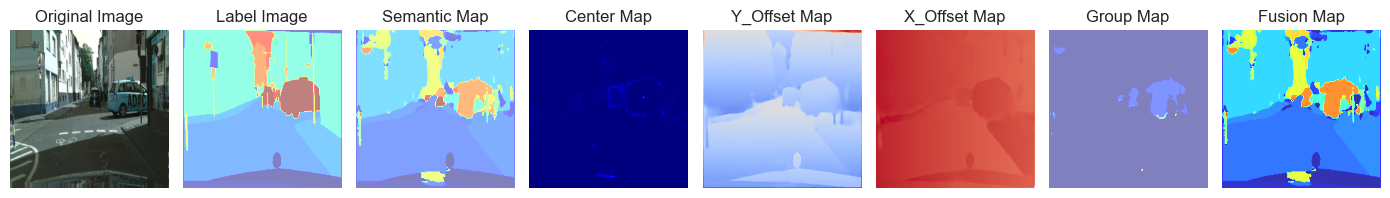

center_map shape: (1, 224, 224, 1)
offset_map shape: (1, 224, 224, 2)
semantic_map_range tf.Tensor(26, shape=(), dtype=int64) tf.Tensor(1, shape=(), dtype=int64) (224, 224)
center_map_range tf.Tensor(0.97105163, shape=(), dtype=float32) tf.Tensor(1.2126144e-24, shape=(), dtype=float32) (1, 224, 224, 1)
offset_Ymap_range tf.Tensor(179.6028, shape=(), dtype=float32) tf.Tensor(-111.55987, shape=(), dtype=float32) tf.Tensor(
[[ 108.40986   144.34508   114.56679  ...  117.10034   119.70508
   114.71014 ]
 [ 120.08336   143.4153     41.90201  ...  173.64182   166.67747
   116.82766 ]
 [ 118.02188   158.88411    40.38036  ...  173.19823   166.3538
   112.34669 ]
 ...
 [-101.1931    -49.82325   -49.92038  ...  -14.113725  -14.969816
  -105.851395]
 [-103.317314  -51.02066   -51.531254 ...  -15.835496  -14.955273
  -108.168236]
 [-104.056725 -103.196144 -105.14565  ... -111.55987  -109.845764
  -105.88368 ]], shape=(224, 224), dtype=float32)
offset_Xmap_range tf.Tensor(115.01014, shape=(), dtyp

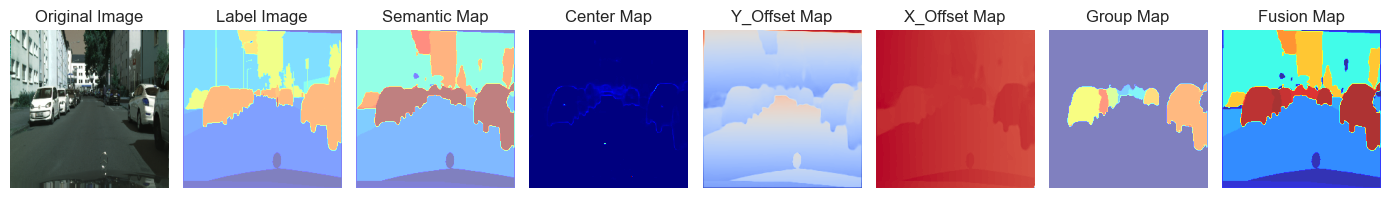

1/1 [==============================] - 0s 28ms/step
center_map shape: (1, 224, 224, 1)
offset_map shape: (1, 224, 224, 2)
semantic_map_range tf.Tensor(33, shape=(), dtype=int64) tf.Tensor(1, shape=(), dtype=int64) (224, 224)
center_map_range tf.Tensor(0.9837669, shape=(), dtype=float32) tf.Tensor(6.4462734e-23, shape=(), dtype=float32) (1, 224, 224, 1)
offset_Ymap_range tf.Tensor(191.02788, shape=(), dtype=float32) tf.Tensor(-119.10994, shape=(), dtype=float32) tf.Tensor(
[[ 102.05248   149.1915    114.99743  ...  117.794395  121.38958
   116.77573 ]
 [ 113.460724  153.14091    47.52476  ...  178.63255   173.38528
   118.285164]
 [ 107.63379   168.741      43.182865 ...  179.09923   174.83365
   113.25218 ]
 ...
 [-103.73986   -49.704796  -49.87848  ...  -14.610199  -14.42496
  -111.41327 ]
 [-106.59165   -50.772938  -51.31338  ...  -15.715616  -14.551317
  -117.648415]
 [-105.93127  -104.72889  -106.93717  ... -119.10994  -117.1761
  -114.96796 ]], shape=(224, 224), dtype=float32)
off

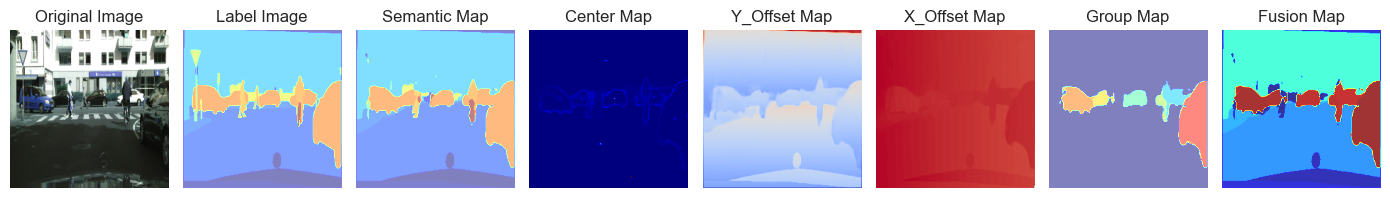

center_map shape: (1, 224, 224, 1)
offset_map shape: (1, 224, 224, 2)
semantic_map_range tf.Tensor(33, shape=(), dtype=int64) tf.Tensor(1, shape=(), dtype=int64) (224, 224)
center_map_range tf.Tensor(0.96047103, shape=(), dtype=float32) tf.Tensor(1.71687e-18, shape=(), dtype=float32) (1, 224, 224, 1)
offset_Ymap_range tf.Tensor(192.51895, shape=(), dtype=float32) tf.Tensor(-111.05456, shape=(), dtype=float32) tf.Tensor(
[[ 102.68705    142.32512    118.16059   ...  121.15262    123.59451
   117.09665  ]
 [ 112.02516    129.59636     46.312756  ...  170.5289     163.4577
   116.50695  ]
 [ 110.13327    136.43187     43.496937  ...  169.50124    161.76706
   112.28491  ]
 ...
 [-102.467316   -49.293236   -49.40209   ...  -13.993954   -14.4069395
  -106.73816  ]
 [-105.122406   -50.319073   -50.68778   ...  -15.371343   -14.588858
  -104.502266 ]
 [-101.917206  -104.23145   -105.6602    ... -111.05456   -109.06874
  -105.53157  ]], shape=(224, 224), dtype=float32)
offset_Xmap_range tf.Ten

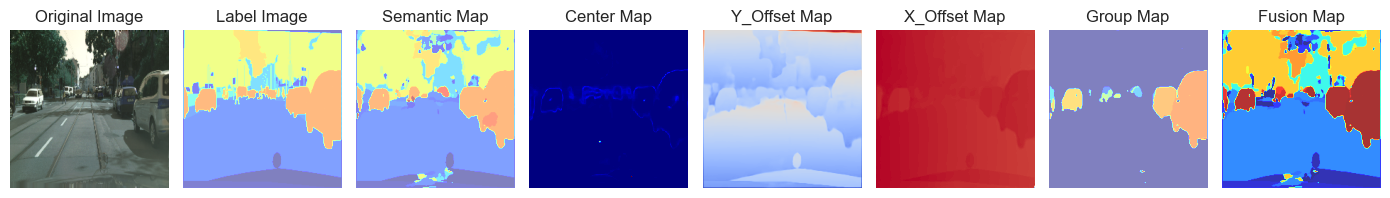

In [15]:
#Post-processing for the outputs three maps
def find_instance_center(ctr_hmp, threshold=0.1, nms_kernel=3, top_k=None):   
    if tf.shape(ctr_hmp)[0] != 1:      
        raise ValueError('Only supports inference for batch size = 1')
        
    # Apply thresholding to the center heatmap
    ctr_hmp = tf.where(ctr_hmp > threshold, ctr_hmp, -tf.ones_like(ctr_hmp))
    
    # Non-Maximum Suppression (NMS)
    ctr_hmp_max_pooled = tf.nn.max_pool2d(ctr_hmp, ksize=nms_kernel, strides=1, padding='SAME')
    ctr_hmp = tf.where(ctr_hmp == ctr_hmp_max_pooled, ctr_hmp, -tf.ones_like(ctr_hmp))
    
    # Squeeze to remove batch and channel dimensions
    ctr_hmp = tf.squeeze(ctr_hmp, axis=[0, 3])
    
    # Find coordinates of the remaining centers
    ctr_all = tf.cast(tf.where(ctr_hmp > 0), tf.float32)
    
    # Return the top-k centers if required   
    if top_k is not None and tf.shape(ctr_all)[0] > top_k:
        top_k_scores = tf.nn.top_k(tf.reshape(ctr_hmp, [-1]), k=top_k).values
        ctr_all = tf.where(ctr_hmp >= top_k_scores[-1])
        
    return ctr_all
    
def group_pixels(ctr, offsets): 
    if tf.shape(offsets)[0] != 1:    
        raise ValueError('Only supports inference for batch size = 1')
        
    offsets = tf.squeeze(offsets, axis=0)
    height, width = tf.shape(offsets)[0], tf.shape(offsets)[1]
    
    # Create coordinate maps for the entire image
    y_coord = tf.range(height, dtype=offsets.dtype)
    x_coord = tf.range(width, dtype=offsets.dtype)
    y_coord, x_coord = tf.meshgrid(y_coord, x_coord, indexing='ij')
    coord_map = tf.stack([y_coord, x_coord], axis=-1)
    
    # Compute the predicted location of each pixel using the offsets
    predicted_loc = coord_map + offsets
    
    # Flatten the coordinates and predicted locations for distance computation
    predicted_loc_flat = tf.reshape(predicted_loc, [-1, 2])
    ctr = tf.expand_dims(ctr, axis=1)
    
    # Ensure both tensors are of type float32 for the subtraction
    ctr = tf.cast(ctr, tf.float32)  # Convert ctr to float32
    predicted_loc_flat = tf.cast(predicted_loc_flat, tf.float32)  # Ensure predicted_loc_flat is float32
    
    # Compute distances from each pixel to the center points
    distances = tf.norm(ctr - predicted_loc_flat, axis=-1)
    
    # Assign each pixel to the closest center
    instance_id = tf.argmin(distances, axis=0)
    instance_id = tf.reshape(instance_id, [height, width]) + 1  # Offset by 1 to reserve ID=0 for 'stuff'
    
    return tf.expand_dims(instance_id, axis=0)
    
def get_instance_segmentation(sem_seg, ctr_hmp, offsets, thing_list, threshold=0.1, nms_kernel=3, top_k=None, thing_seg=None):   
    if thing_seg is None:       
        # Create a foreground mask for 'thing' classes
        thing_seg = tf.zeros_like(sem_seg)       
        for thing_class in thing_list:
            thing_seg = tf.where(sem_seg == thing_class, 1, thing_seg)
            
    # Find instance centers
    ctr = find_instance_center(ctr_hmp, threshold=threshold, nms_kernel=nms_kernel, top_k=top_k)    
    if tf.shape(ctr)[0] == 0:      
        return tf.zeros_like(sem_seg)
        
    # Group pixels into instances
    ins_seg = group_pixels(ctr, offsets)
    
    return thing_seg * ins_seg
    
def fuse_semantic_instance_with_majority_vote_center(semantic_map, group_map, center_map, n_classes, label_divisor=4, thing_list=list(range(25, n_classes))):
    # Initialize panoptic segmentation map with the void label
    void_label = 0
    stuff_area = 300
    
    pan_seg = np.zeros_like(semantic_map) + void_label

    # Create a binary mask for the 'thing' classes (objects)
    thing_mask = np.zeros_like(semantic_map, dtype=np.uint8)
    for thing_class in thing_list:
        thing_mask[semantic_map == thing_class] = 1

    # Track instance IDs per class for generating unique panoptic IDs
    class_id_tracker = {}

    group_map = group_map.numpy().squeeze()  # Squeeze to remove any extra dimensions
    unique_instance_ids = np.unique(group_map)

    # Merge instances by majority voting  
    for ins_id in unique_instance_ids:
        if ins_id == 0:
            continue  # Ignore background

        # Find regions in the group map that correspond to this instance
        mask = (group_map == ins_id) & (thing_mask == 1)  # Only keep instance areas

        # Ensure the mask contains valid points    
        if np.sum(mask) == 0:
            continue

        # Get the majority semantic class for this instance (within the mask)
        majority_class = np.argmax(np.bincount(semantic_map[mask].flatten()))

        # Track instance IDs to ensure unique IDs      
        if majority_class in class_id_tracker:
            new_instance_id = class_id_tracker[majority_class]
        else:
            class_id_tracker[majority_class] = 1
            new_instance_id = 1
        class_id_tracker[majority_class] += 1

        # Assign the panoptic ID: panoptic_id = semantic_class * label_divisor + instance_id
        pan_seg[mask] = majority_class * label_divisor + new_instance_id

    # Paste stuff classes into unoccupied areas   
    for class_id in range(n_classes):   
        if class_id in thing_list:
            continue  # Skip 'thing' classes

        # Create mask for the 'stuff' class and exclude areas covered by 'thing' instances
        stuff_mask = (semantic_map == class_id) & (thing_mask == 0)

        # Filter out small areas       
        if np.sum(stuff_mask) >= stuff_area:
            pan_seg[stuff_mask] = class_id * label_divisor

    return pan_seg


num_images = 2  # Specify the number of images you want to visualize

for i, (images, labels) in enumerate(val_generator):   
    if i >= num_images:  # Stop after processing num_images   
        break
    # Get model predictions (semantic, center, and offset)
    semantic_pred, center_pred, offset_pred = model.predict(images)
    
    # Process each image in the batch  
    for j in range(images.shape[0]):       
        # Get the predicted semantic, center, and offset maps for the current image
        label_map = np.argmax(labels['semantic_pred'][j], axis=-1)
        semantic_map = np.argmax(semantic_pred[j], axis=-1)  # Get class with max probability
        
        # Get predicted center and offset maps for the current image
        center_map = tf.expand_dims(center_pred[j], axis=0)  # Ensure it's [1, 224, 224, 1]
        offset_map = tf.expand_dims(offset_pred[j], axis=0)  # Should be [1, 224, 224, 2]
        
        # Debugging print statements       
        print('center_map shape:', center_map.shape)     
        print('offset_map shape:', offset_map.shape)
        
        # Print ranges and shapes for debugging      
        print('semantic_map_range', tf.reduce_max(semantic_map), tf.reduce_min(semantic_map), semantic_map.shape)       
        print('center_map_range', tf.reduce_max(center_map), tf.reduce_min(center_map), center_map.shape)      
        print('offset_Ymap_range', tf.reduce_max(offset_map[0, :, :, 0]), tf.reduce_min(offset_map[0, :, :, 0]), offset_map[0, :, :, 0])
        print('offset_Xmap_range', tf.reduce_max(offset_map[0, :, :, 1]), tf.reduce_min(offset_map[0, :, :, 1]), offset_map[0, :, :, 1])
              
        # Group the instance centers with offsets (ensure batch size 1)
        group_map = get_instance_segmentation(
            semantic_map,
            center_map,
            offset_map,
            thing_list=list(range(25, n_classes)),
            threshold=0.1,        
            nms_kernel=7,         
            top_k=200
        )        
        print('group_map_range', tf.reduce_max(group_map), tf.reduce_min(group_map), group_map.shape)
              
        # Fuse the semantic and instance maps with the majority voting approach
        fusion_map = fuse_semantic_instance_with_majority_vote_center(semantic_map, group_map, center_map, n_classes)     
        print('fusion_map_range', fusion_map.max(), fusion_map.min(), fusion_map.shape)     
        #colored_fusion_map = colorize_panoptic_segmentation(fusion_map, n_classes)
                  
        # Visualizing the results
        plt.figure(figsize=(14, 8))
                  
        # Original image
        plt.subplot(1, 8, 1)
        plt.imshow(images[j])
        plt.title('Original Image')
        plt.axis('off')
                  
        # Label image
        plt.subplot(1, 8, 2)
        plt.imshow(label_map, cmap='jet', alpha=0.5)
        plt.title('Label Image')
        plt.axis('off')
                  
        # Semantic Map
        plt.subplot(1, 8, 3)
        plt.imshow(semantic_map, cmap='jet', alpha=0.5)
        plt.title('Semantic Map')
        plt.axis('off')
                  
        # Center Map
        plt.subplot(1, 8, 4)
        plt.imshow(tf.squeeze(center_map), cmap='jet', interpolation='nearest')  # Squeeze to remove the last dimension
        plt.title('Center Map')
        plt.axis('off')
                  
        # Offset Map (visualizing x and y offsets)
        plt.subplot(1, 8, 5)
        plt.imshow(offset_map[0, :, :, 0], cmap='coolwarm')
        plt.title('Y_Offset Map')
        plt.axis('off')
                  
        plt.subplot(1, 8, 6)
        plt.imshow(offset_map[0, :, :, 1], cmap='coolwarm')
        plt.title('X_Offset Map')
        plt.axis('off')
                  
        # Group Map     
        plt.subplot(1, 8, 7)
        plt.imshow(np.squeeze(group_map), cmap='jet', alpha=0.5)  # Access the first (and only) batch
        plt.title('Group Map')
        plt.axis('off')
                  
        # Fusion Map
        plt.subplot(1, 8, 8)
        plt.imshow(fusion_map, cmap='jet', alpha=0.8)        
        #plt.imshow(colored_fusion_map)
        plt.title('Fusion Map')
        plt.axis('off')
                  
        plt.tight_layout()
        plt.show()